In [46]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import pandas as pd
from scipy.stats import linregress


import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [47]:
folder = "../build/"
all_folders = glob.glob(os.path.join(folder, "fbmc_*/"))
all_folders.sort(key=os.path.getmtime, reverse=True)
print("Recent simulation folders:")
for f in all_folders[:5]:
    print(f)


Recent simulation folders:
../build/fbmc_Si_300.0_12000/
../build/fbmc_Si_300.0_10000/
../build/fbmc_Si_300.0_5000/
../build/fbmc_Si_300.0_1000/
../build/fbmc_Si_300.0_0/


In [48]:
kB = 8.617333262145e-5  # eV/K
T = 300  # K
thermal_energy = (3.0/2.0) * kB * T


for folder in all_folders[:1]:

    all_files = glob.glob(os.path.join(folder, "simulation_result*.csv"))
    # sort files by modification time
    all_files.sort(key=os.path.getmtime, reverse=True)
    print(f"Number of files found: {len(all_files)}")
    NbFilesToPlot = 100
    NbFilesToPlot = len(all_files)  # plot all files
    all_energies = np.array([])
    all_x_pos = []
    all_y_pos = []
    all_z_pos = []
    all_vxs = []
    all_vys = []
    all_vzs = []
    all_dE = np.array([])
    for file in all_files[:NbFilesToPlot]:
        data = np.loadtxt(file, delimiter=',', skiprows=1)
        time = data[:, 0]
        nb_cols = data.shape[1]
        m_to_cm = 100.0
        x_pos = m_to_cm * data[:, 2]  # in cm
        y_pos = m_to_cm * data[:, 3]
        z_pos = m_to_cm * data[:, 4]
        nb_iter = data.shape[0]
        max_time = time[-1]
        Ninterp = 10000
        time_interp = np.linspace(0.0, max_time, Ninterp)
        x_pos_interp = np.interp(time_interp, time, x_pos)
        y_pos_interp = np.interp(time_interp, time, y_pos)
        z_pos_interp = np.interp(time_interp, time, z_pos)
        all_x_pos.append(x_pos_interp)
        all_y_pos.append(y_pos_interp)
        all_z_pos.append(z_pos_interp)
        all_vxs.append(x_pos_interp[-1]/max_time)
        all_vys.append(y_pos_interp[-1]/max_time)
        all_vzs.append(z_pos_interp[-1]/max_time)

all_x_pos = np.array(all_x_pos)
all_y_pos = np.array(all_y_pos)
all_z_pos = np.array(all_z_pos)
all_vxs = np.array(all_vxs)
all_vys = np.array(all_vys)
all_vzs = np.array(all_vzs)



Number of files found: 10


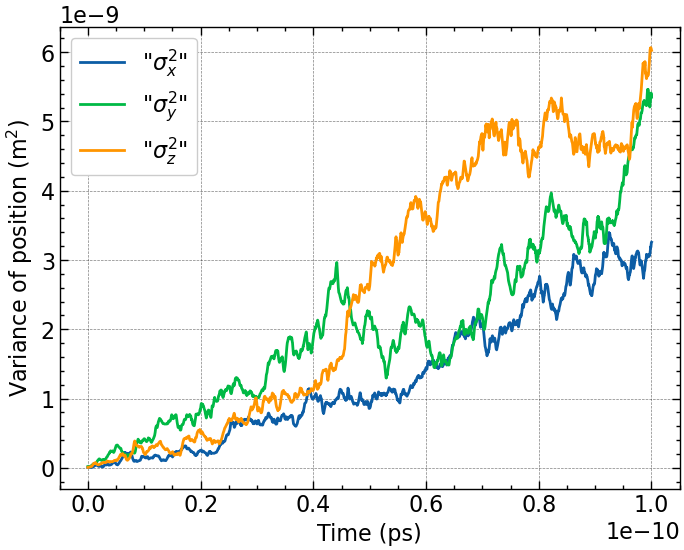

D_x = 16.573473153913778 cm2/s
D_y = 19.866847215279673 cm2/s
D_z = 32.18887212201723 cm2/s
mu_x = 641.0905651720541 cm2/Vs
mu_y = 768.4839617592659 cm2/Vs
mu_z = 1245.121166174024 cm2/Vs
Mean vx = 5.62e+06 cm/ps
Mean vy = 2.57e+05 cm/ps
Mean vz = 1.23e+05 cm/ps


In [49]:
sigma2_x = np.var(all_x_pos, axis=0)
sigma2_y = np.var(all_y_pos, axis=0)
sigma2_z = np.var(all_z_pos, axis=0)
fig, ax = plt.subplots(1)
ax.plot(time_interp, sigma2_x, label='"$\sigma_x^2$"')
ax.plot(time_interp, sigma2_y, label='"$\sigma_y^2$"')
ax.plot(time_interp, sigma2_z, label='"$\sigma_z^2$"')
# Linear fits
slope_x, intercept_x, r_value, p_value, std_err = linregress(time_interp, sigma2_x)
slope_y, intercept_y, r_value, p_value, std_err = linregress(time_interp, sigma2_y)
slope_z, intercept_z, r_value, p_value, std_err = linregress(time_interp, sigma2_z)
# ax.plot(time_interp, intercept_x + slope_x * time_interp, '--', label=f'"Fit $\sigma_x^2$"')
# ax.plot(time_interp, intercept_y + slope_y * time_interp, '--', label=f'"Fit $\sigma_y^2$"')
# ax.plot(time_interp, intercept_z + slope_z * time_interp, '--', label=f'"Fit $\sigma_z^2$"')

ax.set_xlabel("Time (ps)")
ax.set_ylabel("Variance of position (m$^2$)")
ax.legend()
plt.show()

# Einsteins relation: sigma2 = 2 D t
D_x = slope_x / 2.0
D_y = slope_y / 2.0
D_z = slope_z / 2.0
print(f"D_x = {D_x} cm2/s")
print(f"D_y = {D_y} cm2/s")
print(f"D_z = {D_z} cm2/s")

# From diffusion to mobility: mu = q D / (kB T)
q = 1.602176634e-19  # C
kB_SI = 1.380649e-23  # J/K
T = 300  # K
mu_x = (q * D_x) / (kB_SI * T)  # cm2/Vs
mu_y = (q * D_y) / (kB_SI * T)
mu_z = (q * D_z) / (kB_SI * T)
print(f"mu_x = {mu_x} cm2/Vs")
print(f"mu_y = {mu_y} cm2/Vs")
print(f"mu_z = {mu_z} cm2/Vs")


mean_vx = np.abs(np.mean(all_vxs))
mean_vy = np.abs(np.mean(all_vys))
mean_vz = np.abs(np.mean(all_vzs))
print(f"Mean vx = {mean_vx:.2e} cm/ps")
print(f"Mean vy = {mean_vy:.2e} cm/ps")
print(f"Mean vz = {mean_vz:.2e} cm/ps")

In [50]:
file_phononss = glob.glob(os.path.join(folder, "*eph*.msh"))
print(file_phononss)
data_phonons = np.loadtxt(file_phononss[0], delimiter=',', skiprows=1)
NbCols = data_phonons.shape[1]
# vtx, band, energy, rates...
energies_ph = data_phonons[:, 2]
total_rates_ph = np.sum(data_phonons[:, 3:NbCols], axis=1)
fig, ax = plt.subplots(1, figsize=(8, 6))

ene_fbmc = energy_data
gamma_fbmc = gamma_data

ax.scatter(ene_fbmc, gamma_fbmc, s=1, c='r', label='FBMC data')
ax.scatter(energies_ph, total_rates_ph, s=1, c='b', label='Phonon data')
# for idx in range(0, 8):
#     rates_ph = data_phonons[:, 3 + idx]
#     ax.scatter(energies_ph, rates_ph, s=1)
ax.set_xlabel("Phonon Energy (eV)")
ax.set_ylabel("Total Scattering rate (1/s)")
ax.legend(fontsize=10, loc='upper right')
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2e14)
plt.show()

[]


IndexError: list index out of range

In [ ]:
file_phononss = glob.glob(os.path.join(folder, "*eph*.msh"))
print(file_phononss)
data_phonons = np.loadtxt(file_phononss[0], delimiter=',', skiprows=1)
NbCols = data_phonons.shape[1]
# vtx, band, energy, rates...
energies_ph = data_phonons[:, 2]
total_rates_ph = np.sum(data_phonons[:, 3:NbCols], axis=1)



file_gammas = folder + "eelph_test_output.txt"
data_gammas = np.loadtxt(file_gammas, delimiter=',', skiprows=1)
energies_gammas = data_gammas[:, 0]
rates_gammas = data_gammas[:, 1:]
sum_rates_gammas = np.sum(rates_gammas, axis=1)

file_fin = f"{folder}fbmc_debug_log.txt"
data_fbmc = pd.read_csv(file_fin, names=["energy", "sum_rates", "Gamma"])
energies_fbmc = data_fbmc["energy"].to_numpy()
sum_rates_fbmc = data_fbmc["sum_rates"].to_numpy()
gammas_fbmc = data_fbmc["Gamma"].to_numpy()



fig, ax = plt.subplots(1, figsize=(8, 6))
ax.scatter(energies_gammas, sum_rates_gammas, s=5, c='k',marker='>', label='Electron data')
ax.scatter(all_energies, all_gammas, s=5, c='k',marker='>', label='Electron data')
ax.scatter(energies_ph, total_rates_ph, s=1, c='b', label='Phonon data')
ax.scatter(energies_fbmc, sum_rates_fbmc, s=5, c='r', marker='x', label='FBMC sum rates')
ax.scatter(energies_fbmc, gammas_fbmc, s=5, c='g', marker='o', label='FBMC Gamma')

# for idx in range(0, 8):
#     rates_ph = data_phonons[:, 3 + idx]
#     ax.scatter(energies_ph, rates_ph, s=1)
ax.set_xlabel("Phonon Energy (eV)")
ax.set_ylabel("Total Scattering rate (1/s)")
ax.legend(fontsize=10, loc='upper right')
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2e14)
plt.show()

[]


IndexError: list index out of range

/tmp/ipykernel_452016/2978429793.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


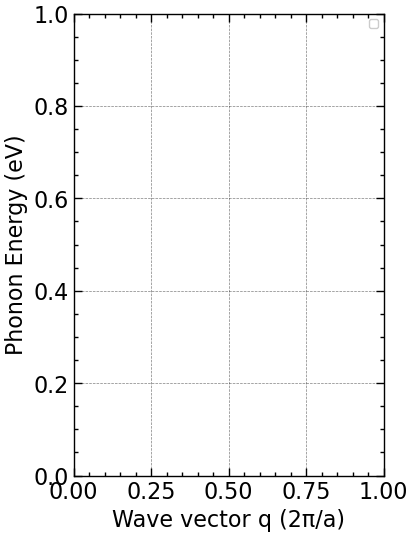

In [ ]:
files = glob.glob(os.path.join(folder, "*_dispersion.csv"))
fig, ax = plt.subplots(1, figsize=(4, 6))
for f in files:
    q, omega, energy = np.loadtxt(f, delimiter=',', unpack=True, skiprows=1)

    a = 5.43e-10  # m
    fact = 2 * np.pi / a
    q_scaled = q / fact
    ax.plot(q_scaled, energy, label=os.path.basename(f).replace("_dispersion.csv",""))
# ax.set_xlim(0, 1)
ax.set_xlabel("Wave vector q (2π/a)")
ax.set_ylabel("Phonon Energy (eV)")
ax.legend(fontsize=8)
plt.show()